# **AIML Module Project - Recommendation Systems** - Total Score 60

## Lakshman Kumar S

• **DOMAIN:** Smartphone, Electronics

• **CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

• **DATA DESCRIPTION:**

• **author** : name of the person who gave the rating

• **country** : country the person who gave the rating belongs to

• **data** : date of the rating

• **domain**: website from which the rating was taken from

• **extract**: rating content

• **language**: language in which the rating was given

• **product**: name of the product/mobile phone for which the rating was given

• **score**: average rating for the phone

• **score_max**: highest rating given for the phone

• **source**: source from where the rating was taken

• **PROJECT OBJECTIVE:** We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

### Steps and tasks: [ Total Score: 60 points]

#### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]


In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline


# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
import pickle
from sklearn import svm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

# Suppress warnings
import warnings; warnings.filterwarnings('ignore', message = 'old')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

##### A. Merge all the provided CSVs into one dataFrame. [2 Marks]


In [2]:
phone_user_review_file_1 = pd.read_csv('phone_user_review_file_1.csv', sep=",", on_bad_lines='skip', encoding="latin-1")
phone_user_review_file_2 = pd.read_csv('phone_user_review_file_2.csv', sep=",", on_bad_lines='skip', encoding="latin-1")
phone_user_review_file_3 = pd.read_csv('phone_user_review_file_3.csv', sep=",", on_bad_lines='skip', encoding="latin-1")
phone_user_review_file_4 = pd.read_csv('phone_user_review_file_4.csv', sep=",", on_bad_lines='skip', encoding="latin-1")
phone_user_review_file_5 = pd.read_csv('phone_user_review_file_5.csv', sep=",", on_bad_lines='skip', encoding="latin-1")

In [3]:
phone_user_review = pd.concat([phone_user_review_file_1,phone_user_review_file_2,phone_user_review_file_3, 
                               phone_user_review_file_4, phone_user_review_file_5])

In [4]:
phone_user_review.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [5]:
row, column = phone_user_review.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1251296 rows and 11 columns


##### B. Explore, understand the Data and share at least 2 observations. [2 Marks]


In [6]:
phone_user_review.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [7]:
phone_user_review.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1199479.0,8.050337,2.622776,0.2,8.0,10.0,10.0,10.0
score_max,1199479.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0


In [8]:
#percentage null values
(phone_user_review.isnull().sum()* 100 / len(phone_user_review)).sum()

13.60613316113853

In [9]:
phone_user_review.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

**Observations**
1. On seeing the data, we could infere that there are only 2 columns with numeric values (Score and Score_max)
2. The data contains various countries and respective language as well
3. score_max column has all 5 point summary as '10', which implies it only has one value which is 10.0, so this column can be excluded as it is not going to add any value to our model
4. Column score has median, max and third quartile as 10, which means score is left skewed and unsymmetrical in shape
5. In total, there are 13.606% null values in the dataset
6. Column score has dtype as object, since its numeric it should by either Float64 or Int64

##### C. Round off scores to the nearest integers. [3 Marks]


In [10]:
phone_user_review['score'] = round(phone_user_review['score'])

In [11]:
phone_user_review['score'] = phone_user_review['score'].astype('Int64')

In [12]:
phone_user_review.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score          Int64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [13]:
phone_user_review.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


Thus, the column is score is rounded off to integer and data type of the column is modified to Int64

##### D. Check for missing values. Impute the missing values, if any. [2 Marks]


In [14]:
(phone_user_review.isnull().sum()* 100 / len(phone_user_review)).sum()

13.60613316113853

In total, there are 13.606% null values in the dataset

In [15]:
# imputing the null values
for cols in phone_user_review.columns: # Loop through all columns in the dataframe
    if phone_user_review[cols].dtype == ('int64' or 'float64'):
        phone_user_review[cols] = phone_user_review[cols].fillna(phone_user_review[cols].median())
        
phone_user_review = phone_user_review.dropna()

In [16]:
(phone_user_review.isnull().sum()* 100 / len(phone_user_review)).sum()

0.0

After imputing, the percentage of null values is 0%

In [17]:
row, column = phone_user_review.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1138675 rows and 11 columns


##### E. Check for duplicate values and remove them, if any. [2 Marks]


In [18]:
colu = []
for cols in phone_user_review.columns: # Loop through all columns in the dataframe
    if (len(phone_user_review[cols].drop_duplicates())) == 1:
        phone_user_review.drop(cols, axis=1, inplace=True)
        colu.append(cols) 

In [19]:
row, column = phone_user_review.shape
print('The dataset before dropping duplicates contains', row, 'rows and', column, 'columns')

The dataset before dropping duplicates contains 1138675 rows and 10 columns


In [20]:
phone_user_review= phone_user_review.drop_duplicates()

In [21]:
row, column = phone_user_review.shape
print('The dataset after dropping duplicates contains', row, 'rows and', column, 'columns')

The dataset after dropping duplicates contains 1134493 rows and 10 columns


##### F. Keep only 1 Million data samples. Use random state=612. [2 Marks]


In [22]:
phone_user_review_sample = phone_user_review.sample(n = 1000000, random_state=612, axis = 0)

In [23]:
row, column = phone_user_review_sample.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1000000 rows and 10 columns


In [24]:
phone_user_review_sample.head()

,phone_url,date,lang,country,source,domain,score,extract,author,product
3615,/cellphones/nokia-lumia-630/,1/7/2015,pt,br,Shop Fato,shopfato.com.br,10,"Muito rapido, roda tudo liso, som bem legal, t...",inffomaster1976@gmail.com,"Smartphone Nokia Lumia 630 Dual, 3G TV Digital..."
43477,/cellphones/sony-xperia-z3-compact/,12/15/2014,nl,nl,KIESKEURIG,kieskeurig.nl,9,Ik ben nu sinds een paar weken in het bezit va...,PriscillaFleur,Sony Xperia Z3 Compact oranje / 16 GB - Overzicht
34348,/cellphones/samsung-galaxy-s7-789999/,10/18/2016,nl,be,KIESKEURIG,kieskeurig.be,9,Ik heb simpelweg opgezocht wat momenteel de be...,jos,Samsung Galaxy S7 zwart / 32 GB
93259,/cellphones/google-nexus-6/,2/19/2015,en,us,Amazon,amazon.com,10,"nice, a little bit big for my hands, but nice ...",Amazon Customer,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U..."
205718,/cellphones/google-nexus-5x-h791/,11/19/2015,en,us,Amazon,amazon.com,10,Perfect! as expected.,Amazon Customer,"LG Electronics Nexus 5X Unlocked Smart Phone, ..."


##### G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]


In [25]:
phone_user_review_rel = phone_user_review.copy(deep=True)

In [26]:
phone_user_review_rel.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'extract', 'author', 'product'],
      dtype='object')

In [27]:
colu = ['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'extract']
phone_user_review_rel = phone_user_review_rel.drop(colu, axis = 1)

In [28]:
phone_user_review_rel.columns

Index(['score', 'author', 'product'], dtype='object')

In [29]:
phone_user_review_rel.drop_duplicates(inplace=True)

In [30]:
row, column = phone_user_review_rel.shape
print('The dataset after dropping irrelevant features contains', row, 'rows and', column, 'columns')

The dataset after dropping irrelevant features contains 1013752 rows and 3 columns


#### 2. Answer the following questions. [10 Marks]


##### A. Identify the most rated products. [3 Marks]


In [31]:
ratings_product_mean_count = phone_user_review_rel.groupby('product')['score'].value_counts().sort_values(ascending=False)  

In [32]:
ratings_product_mean_count = pd.DataFrame(ratings_product_mean_count)
ratings_product_mean_count.rename(columns = {'score':'product_count'}, inplace = True)
ratings_product_mean_count.reset_index(inplace=True)

**Most Rated Products with maximum score or grouped by score is**

In [33]:
ratings_product_mean_count.head(5)

,product,score,product_count
0,"OnePlus 3 (Graphite, 64 GB)",10,1572
1,"OnePlus 3 (Soft Gold, 64 GB)",10,1190
2,Samsung Galaxy S7 edge 32GB (Verizon),10,1129
3,Samsung Galaxy S7 edge 32GB (T-Mobile),10,1118
4,Samsung Galaxy J3 (8GB),10,1104


In [34]:
ratings_product_count = ratings_product_mean_count.groupby('product')['product_count'].sum().sort_values(ascending=False)  
ratings_product_count = pd.DataFrame(ratings_product_count)
ratings_product_count.reset_index(inplace=True)

**Most Rated product irrespective of score value is**

In [35]:
ratings_product_count.head()

,product,product_count
0,"OnePlus 3 (Graphite, 64 GB)",2219
1,"Lenovo Vibe K4 Note (White,16GB)",2124
2,"Lenovo Vibe K4 Note (Black, 16GB)",1836
3,Samsung Galaxy J3 (8GB),1801
4,"OnePlus 3 (Soft Gold, 64 GB)",1793


##### B. Identify the users with most number of reviews. [3 Marks]


In [36]:
ratings_author_mean_count = phone_user_review_rel.groupby('author')['score'].value_counts().sort_values(ascending=False)  

In [37]:
ratings_author_mean_count = pd.DataFrame(ratings_author_mean_count)
ratings_author_mean_count.rename(columns = {'score':'author_count'}, inplace = True)
ratings_author_mean_count.reset_index(inplace=True)

**Users with most number of reviews with respect to score ie. grouped by score**

In [38]:
ratings_author_mean_count.head(5)

,author,score,author_count
0,Amazon Customer,10,5489
1,Amazon Customer,2,3398
2,Amazon Customer,8,3212
3,Cliente Amazon,10,2224
4,Amazon Customer,6,2155


In [39]:
ratings_author_count = ratings_author_mean_count.groupby('author')['author_count'].sum().sort_values(ascending=False)  
ratings_author_count = pd.DataFrame(ratings_author_count)
ratings_author_count.reset_index(inplace=True)

**Users with most number of reviews irrespective of score**

In [40]:
ratings_author_count.head()

,author,author_count
0,Amazon Customer,16112
1,Cliente Amazon,6348
2,Client d'Amazon,2685
3,Amazon Kunde,1948
4,Anonymous,1205


In [41]:
phone_user_review_rel.groupby('author')['score'].count().sort_values(ascending=False).head()  

author
Amazon Customer    16112
Cliente Amazon      6348
Client d'Amazon     2685
Amazon Kunde        1948
Anonymous           1205
Name: score, dtype: int64

##### C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final  dataset. [4 Marks]


In [42]:
counts1 = phone_user_review_rel['author'].value_counts()
# Users who have given more than 50 ratings
phone_user_review_50data = phone_user_review_rel[phone_user_review_rel['author'].isin(counts1[counts1 > 50].index)]

In [43]:
counts2 = phone_user_review_rel['product'].value_counts()
# products having more than 50 ratings and users who have given more than 50 ratings
phone_user_review_50data = phone_user_review_50data[phone_user_review_50data['product'].isin(counts2[counts2 > 50].index)]

In [44]:
phone_user_review_50data.tail()

,score,author,product
349277,8,Amazon Customer,"Samsung SGH-U900 (5 MP-Kamera, UMTS/ HSDPA, MP..."
349638,10,joe,Nokia N91
349644,10,alex,Nokia N91
349648,9,Dave,Nokia N91
349824,2,anonym,LG Secret KF750


In [45]:
row, column = phone_user_review_50data.shape
print('The dataset after selecting data with products having more than 50 ratings and users who have given more than 50 ratings contains', row, 'rows and', column, 'columns')

The dataset after selecting data with products having more than 50 ratings and users who have given more than 50 ratings contains 62028 rows and 3 columns


#### 3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]


The easiest type of recommendation system is based on item popularity. This system calculates product ratings using explicit or implicit data. Below you can find two examples of popularity based recommendation systems for a movie provider:

**using explicit data** – suggests popular movies based on the average of the user 5-stars ratings.

**using implicit data** – suggests popular movies on the basis of the number of times users played them.  

In [46]:
phone_user_review_50data.groupby('product')['score'].mean().head()  

product
3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5830 [Appareils Ã©lectroniques]                                                                                                                         6.0
5-Zoll- Android 4.2 Cubot P9 3G Smart Phone MTK6572 Dual Core 1.3GHz QHD IPS Schirm 512MB RAM 4GB ROM GPS 8MP...                                                                                    10.0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)                                             5.666667
AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)         8.4
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)                

In [47]:
#Based on mean of score
phone_user_review_50data.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
Samsung Galaxy Note II LTE GT-N7105 16GB                                                                                                           10.0
BlackBerry Passport                                                                                                                                10.0
LG Optimus L9                                                                                                                                      10.0
Samsung Galaxy S GT-I9000                                                                                                                          10.0
LG Electronics E460 Optimus L5 II Smartphone (10,2 cm (4 Zoll) Touchscreen, 1GHz, 512MB RAM, 5 Megapixel Kamera, Android 4.1) glÃ¤nzend-schwarz    10.0
Name: score, dtype: Float64

In [48]:
#Based on count of score
phone_user_review_50data.groupby('product')['score'].count().sort_values(ascending=False).head()  

product
Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]                         220
Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]                                  198
Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]    195
Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco                                                            193
Huawei P8lite zwart / 16 GB                                                                                                                                                                  192
Name: score, dtype: int64

In [49]:
phone_user_review_50data_mean_count = pd.DataFrame(phone_user_review_50data.groupby('product')['score'].mean()) 

In [50]:
phone_user_review_50data_mean_count['score_counts'] = pd.DataFrame(phone_user_review_50data.groupby('product')['score'].count())  

In [51]:
phone_user_review_50data_mean_count.head()

,score,score_counts
product,,
3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5830 [Appareils Ã©lectroniques],6.0,2
5-Zoll- Android 4.2 Cubot P9 3G Smart Phone MTK6572 Dual Core 1.3GHz QHD IPS Schirm 512MB RAM 4GB ROM GPS 8MP...,10.0,3
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5.666667,6
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",8.4,5
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",7.5,8


**Top 5 mobile phones which are very popular and having best mean score with more number of ratings are**

In [52]:
phone_user_review_50data_mean_count.sort_values(by=['score','score_counts'], ascending=False).head()

,score,score_counts
product,,
Samsung Galaxy Note5,10.0,32
Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold,10.0,10
Motorola Defy,10.0,9
"Samsung Galaxy S Plus I9001 Smartphone (10,16 cm (4 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Android Betriebssystem) pure-white",10.0,9
Samsung N7100 Galaxy Note II (16Gb),10.0,9


In [53]:
print('Top 5 mobile phones which are very popular and having best mean score with more number of ratings are:')
phone_user_review_50data_mean_count.sort_values(by=['score','score_counts'], ascending=False).reset_index()['product'].head()

Top 5 mobile phones which are very popular and having best mean score with more number of ratings are:


0                                 Samsung Galaxy Note5
1    Sim Free Samsung Galaxy S6 Edge Mobile Phone -...
2                                        Motorola Defy
3    Samsung Galaxy S Plus I9001 Smartphone (10,16 ...
4                  Samsung N7100 Galaxy Note II (16Gb)
Name: product, dtype: object

Business scenarios we **should use** popularity based Recommendation Systems are:

**It is user cold-start resistant.** The system can suggest products without any information about the user.

**It can be used in environments with a small number of users.**

Business scenarios we **should not use** popularity based Recommendation Systems are:

**Every user has the same recommendation list.**

**Item cold start problem.** The system cannot propose an item that has never been selected or a rating by other users before. 

#### 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]


In collaborative filtering, the system analyzes information about preferences, behaviour, and activities of all users to predict what you might like. Simply put, the system recommends items that other users with similar tastes and behaviour liked. The main assumption of this method is that people who liked similar products in the past will also like similar products in the future.

In [54]:
from surprise import KNNWithMeans

from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate

from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

In [55]:
phone_user_review_50data = phone_user_review_50data.reindex(columns=['author','product','score'])

phone_user_review_50data.tail()

,author,product,score
349277,Amazon Customer,"Samsung SGH-U900 (5 MP-Kamera, UMTS/ HSDPA, MP...",8
349638,joe,Nokia N91,10
349644,alex,Nokia N91,10
349648,Dave,Nokia N91,9
349824,anonym,LG Secret KF750,2


In [56]:
phone_user_review_50data.shape

(62028, 3)

In [57]:
phone_user_review_50data.score.unique()

<IntegerArray>
[10, 8, 9, 6, 4, 7, 5, 2, 3, 1]
Length: 10, dtype: Int64

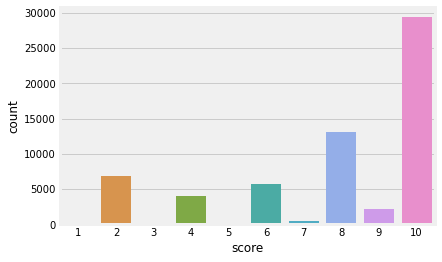

In [58]:
#plotting count of score
sns.countplot(data=phone_user_review_50data , x='score')
plt.show()

In [59]:
data = Dataset.load_from_df(phone_user_review_50data [['author', 'product', 'score']], reader)

In [60]:
data.df.head(2)

,author,product,score
253,Ralf,Samsung Galaxy S8 Zwart,10
271,ÐÐ³Ð¾Ñ,Samsung Galaxy S8,10


### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) Author and Product in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert raw id to inner id and vice verca

### SVD Based Recommendation System

In [61]:
# Split data to train and test
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

# to build on full data
#trainset = data.build_full_trainset()

In [62]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000004B8D6BA510>

In [63]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
#print(trainset.to_raw_iid(1066))

Amazon Customer


In [64]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [65]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [66]:
testset[0]

('Amazon Customer', 'Kyocera Event Prepaid Android Phone (Virgin Mobile)', 6.0)

In [67]:
test_pred_svd = svd_model.test(testset)

In [68]:
# compute RMSE SVD
accuracy.rmse(test_pred_svd, verbose=True)

RMSE: 2.9314


2.9314052307101606

#### Collaborative filtering KNNWithMeans User-User

In [69]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [70]:
# run the trained model against the testset
test_pred_user = algo_user.test(testset)

In [71]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)

User-based Model : Test Set
RMSE: 3.1480


3.147992144233166

In [72]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_user_cos = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
algo_user_cos.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [73]:
# run the trained model against the testset
test_pred_user_cos = algo_user_cos.test(testset)

In [74]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user_cos, verbose=True)

User-based Model : Test Set
RMSE: 2.7534


2.753447446419333

#### Collaborative filtering KNNWithMeans Item-Item

In [75]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [76]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)

In [77]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 3.0149


3.014925099040931

In [78]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_item_cos = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo_item_cos.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [79]:
# run the trained model against the testset
test_pred_item_cos = algo_item_cos.test(testset)

In [80]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item_cos, verbose=True)

Item-based Model : Test Set
RMSE: 2.7875


2.7874910595758604

The cosine similarity computes the similarity between two samples, whereas the Pearson correlation coefficient computes the correlation between two jointly distributed random variables. So, we are choosing Pearson similarity for our case.

Business scenarios we **should use** CF based Recommendation Systems are:

**The content of the product is not required to be in any way understood or described neither by the creator of the system nor the system itself.** This means that the system can recommend products without any analysis of the product itself.

**It is adaptive.** The system captures changes in users’ interests.  

Business scenarios we **should not use** CF based Recommendation Systems are:

**User cold-start problem.** The system cannot recommend products to new users who have not had any interaction yet.

**Item cold-start problem.** The system cannot also recommend an item that users never selected before.  

#### 5. Evaluate the collaborative model. Print RMSE value. [2 Marks]


**RMSE:** A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. **The lower the RMSE, the better a model fits a dataset.**

In [81]:
# compute RMSE SVD
print("SVD : Test Set")
accuracy.rmse(test_pred_svd, verbose=True)

SVD : Test Set
RMSE: 2.9314


2.9314052307101606

In [82]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)

User-based Model : Test Set
RMSE: 3.1480


3.147992144233166

In [83]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 3.0149


3.014925099040931

RMSE for SVD, User-User, Item-Item are 2.93, 3.14, 3.01. Thus, **SVD Collaborative filtering has the least RMSE**, so SVD collaborative filtering can be chosen as the model.

#### 6. Predict score (average rating) for test users. [2 Marks]


In [84]:
test_pred_svd_df = pd.DataFrame(test_pred_svd)
test_pred_svd_df.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,Kyocera Event Prepaid Android Phone (Virgin Mo...,6.0,6.448401,{'was_impossible': False}
1,Amazon Customer,"Apple iPhone 6 Plus GSM Unlocked Cellphone, 64...",8.0,5.754181,{'was_impossible': False}
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (...",10.0,7.599192,{'was_impossible': False}
3,Don,Apple iPhone 3G 8GB (Black) - AT&T,10.0,8.041748,{'was_impossible': False}
4,ÐÐ½ÑÐ¾Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),2.0,8.269243,{'was_impossible': False}


In [85]:
# Average of test user using svd ratings with respect to users:
test_pred_svd_df.groupby('uid')['est'].mean()

uid
#                                                            7.884444
.                                                            6.112727
????????                                                     8.073723
??????????                                                   7.706999
????????????                                                 8.029159
???????????? ????????                                        6.425195
???????????? ??????????????                                  7.582143
??????????????                                               7.892436
?????????????? ??????????                                    7.280036
?????????????? ????????????                                  7.381717
?????????????? ??????????????                                7.309922
????????????????                                             8.401784
???????????????? ????????                                    7.159756
???????????????? ??????????????                              6.941541
????????????????

In [86]:
# Average of test user ratings using svd irrespective of users:
test_pred_svd_df['est'].mean()

7.678261087058801

In [87]:
test_pred_user_df = pd.DataFrame(test_pred_user)
test_pred_user_df.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,Kyocera Event Prepaid Android Phone (Virgin Mo...,6.0,5.989925,"{'actual_k': 5, 'was_impossible': False}"
1,Amazon Customer,"Apple iPhone 6 Plus GSM Unlocked Cellphone, 64...",8.0,5.285689,"{'actual_k': 5, 'was_impossible': False}"
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (...",10.0,10.000000,"{'actual_k': 1, 'was_impossible': False}"
3,Don,Apple iPhone 3G 8GB (Black) - AT&T,10.0,9.861360,"{'actual_k': 1, 'was_impossible': False}"
4,ÐÐ½ÑÐ¾Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),2.0,8.598267,"{'actual_k': 42, 'was_impossible': False}"


In [88]:
# Average of test user using user-user collaborative filtering ratings with respect to users:
test_pred_user_df.groupby('uid')['est'].mean()

uid
#                                                             8.260854
.                                                             5.458493
????????                                                      7.572607
??????????                                                    8.281633
????????????                                                  8.436391
???????????? ????????                                         6.465984
???????????? ??????????????                                   8.281922
??????????????                                                6.668299
?????????????? ??????????                                     7.276064
?????????????? ????????????                                   7.445286
?????????????? ??????????????                                 7.061461
????????????????                                              8.549239
???????????????? ????????                                     8.507105
???????????????? ??????????????                               6.646836
??

In [89]:
# Average of test user ratings using user-user collaborative filtering irrespective of users:
test_pred_user_df['est'].mean()

7.789114917252914

In [90]:
test_pred_item_df = pd.DataFrame(test_pred_item)
test_pred_item_df.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,Kyocera Event Prepaid Android Phone (Virgin Mo...,6.0,5.778357,"{'actual_k': 50, 'was_impossible': False}"
1,Amazon Customer,"Apple iPhone 6 Plus GSM Unlocked Cellphone, 64...",8.0,5.210411,"{'actual_k': 50, 'was_impossible': False}"
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (...",10.0,10.000000,"{'actual_k': 0, 'was_impossible': False}"
3,Don,Apple iPhone 3G 8GB (Black) - AT&T,10.0,8.841111,"{'actual_k': 13, 'was_impossible': False}"
4,ÐÐ½ÑÐ¾Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),2.0,8.503013,"{'actual_k': 40, 'was_impossible': False}"


In [91]:
# Average of test user using item-item collaborative filtering ratings with respect to users:
test_pred_item_df.groupby('uid')['est'].mean()

uid
#                                                            8.065191
.                                                            4.729485
????????                                                     7.650095
??????????                                                   8.448868
????????????                                                 8.067280
???????????? ????????                                        6.723311
???????????? ??????????????                                  7.640082
??????????????                                               6.892005
?????????????? ??????????                                    7.158011
?????????????? ????????????                                  7.764390
?????????????? ??????????????                                7.620902
????????????????                                             8.199152
???????????????? ????????                                    7.933352
???????????????? ??????????????                              6.673940
????????????????

In [92]:
# Average of test user ratings using item-item collaborative filtering irrespective of users:
test_pred_item_df['est'].mean()

7.758819518327323

#### 7. Report your findings and inferences. [2 Marks]


1. **The lower the RMSE, the better a model fits a dataset.**

2. RMSE for SVD, User-User, Item-Item are 2.93, 3.14, 3.01.

3. Model predicts average rating wherever estimation is not possible

4. Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

5. The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.

6. Thus, **SVD Collaborative filtering has the least RMSE**, so SVD collaborative filtering can be chosen as the model.

#### 8. Try and recommend top 5 products for test users. [5 Marks]


#### Top 5 products using user-user collaborative filtering

In [93]:
recommendation_user_df = pd.DataFrame()
recommendation_user_lst = []
for i in test_pred_user_df['uid'].unique():
    mask = test_pred_user_df[test_pred_user_df['uid'] == i][['uid','iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)
    recommendation_user_lst.append(mask)
recommendation_user_df = pd.concat(recommendation_user_lst) 

In [94]:
recommendation_user_df.shape

(3600, 4)

In [95]:
recommendation_user_df[['uid','iid']]

,uid,iid
8124,Amazon Customer,BLU Life View L110X Unlocked 5.7-Inch 16 GB 12...
11887,Amazon Customer,Samsung GSM Unlocked Samsung i847 Rugby Smart ...
4912,Amazon Customer,Samsung Galaxy S7 Dual Sim Factory Unlocked Ph...
11861,Amazon Customer,HTC One X 16GB Unlocked GSM 4G LTE Dual-Core S...
4941,Amazon Customer,LG G3 D855 32GB 4G LTE Unlocked GSM Quad-HD An...
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (..."
9961,Chris,"Alcatel One Touch Pop C9 Smartphone, Dual SIM,..."
11049,Chris,"Huawei Ascend P1 Smartphone (10,9 cm (4,3 Zoll..."
5133,Chris,"Microsoft Nokia 7230 Handy (3.2 MP, Musikplaye..."
5383,Chris,Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone ...


#### Top 5 products using svd collaborative filtering

In [96]:
recommendation_svd_df = pd.DataFrame()
recommendation_svd_lst = []
for i in test_pred_svd_df['uid'].unique():
    mask = test_pred_svd_df[test_pred_svd_df['uid'] == i][['uid','iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)
    recommendation_svd_lst.append(mask)
recommendation_svd_df = pd.concat(recommendation_svd_lst) 

In [97]:
recommendation_svd_df.shape

(3600, 4)

In [98]:
recommendation_svd_df[['uid','iid']]

,uid,iid
8124,Amazon Customer,BLU Life View L110X Unlocked 5.7-Inch 16 GB 12...
11887,Amazon Customer,Samsung GSM Unlocked Samsung i847 Rugby Smart ...
4912,Amazon Customer,Samsung Galaxy S7 Dual Sim Factory Unlocked Ph...
11861,Amazon Customer,HTC One X 16GB Unlocked GSM 4G LTE Dual-Core S...
4941,Amazon Customer,LG G3 D855 32GB 4G LTE Unlocked GSM Quad-HD An...
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (..."
9961,Chris,"Alcatel One Touch Pop C9 Smartphone, Dual SIM,..."
11049,Chris,"Huawei Ascend P1 Smartphone (10,9 cm (4,3 Zoll..."
5133,Chris,"Microsoft Nokia 7230 Handy (3.2 MP, Musikplaye..."
5383,Chris,Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone ...


#### Top 5 products using item-item collaborative filtering

In [99]:
recommendation_item_df = pd.DataFrame()
recommendation_item_lst = []
for i in test_pred_item_df['uid'].unique():
    mask = test_pred_item_df[test_pred_item_df['uid'] == i][['uid','iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)
    recommendation_item_lst.append(mask)
recommendation_item_df = pd.concat(recommendation_item_lst) 

In [100]:
recommendation_item_df.shape

(3600, 4)

In [101]:
recommendation_item_df[['uid','iid']]

,uid,iid
8124,Amazon Customer,BLU Life View L110X Unlocked 5.7-Inch 16 GB 12...
11887,Amazon Customer,Samsung GSM Unlocked Samsung i847 Rugby Smart ...
4912,Amazon Customer,Samsung Galaxy S7 Dual Sim Factory Unlocked Ph...
11861,Amazon Customer,HTC One X 16GB Unlocked GSM 4G LTE Dual-Core S...
4941,Amazon Customer,LG G3 D855 32GB 4G LTE Unlocked GSM Quad-HD An...
2,Chris,"Microsoft Nokia Lumia 620 Smartphone (9,7 cm (..."
9961,Chris,"Alcatel One Touch Pop C9 Smartphone, Dual SIM,..."
11049,Chris,"Huawei Ascend P1 Smartphone (10,9 cm (4,3 Zoll..."
5133,Chris,"Microsoft Nokia 7230 Handy (3.2 MP, Musikplaye..."
5383,Chris,Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone ...


#### 9. Try other techniques (Example: cross validation) to get better results. [3 Marks]


In [102]:
from surprise.model_selection import cross_validate

In [103]:
#cross validation using item-item collaboration filtering
cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.0336  3.0011  2.9930  3.0155  3.0106  3.0108  0.0138  
MAE (testset)     2.3653  2.3441  2.3296  2.3567  2.3337  2.3459  0.0135  
Fit time          18.56   16.91   21.71   20.47   17.58   19.05   1.79    
Test time         17.54   20.47   25.37   18.39   18

{'test_rmse': array([3.03361935, 3.0011407 , 2.99297515, 3.01547604, 3.01056045]),
 'test_mae': array([2.36526005, 2.34408141, 2.32961712, 2.35666203, 2.33367141]),
 'fit_time': (18.55940055847168,
  16.911705017089844,
  21.70908498764038,
  20.47315812110901,
  17.57764768600464),
 'test_time': (17.543708562850952,
  20.469897031784058,
  25.370493412017822,
  18.385303735733032,
  18.880698919296265)}

In [104]:
#cross validation using user-user collaboration filtering
cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.1426  3.1290  3.1578  3.1729  3.1614  3.1527  0.0153  
MAE (testset)     2.3941  2.3935  2.4118  2.4159  2.4230  2.4077  0.0119  
Fit time          0.90    0.85    0.86    0.81    0.68    0.82    0.08    
Test time         1.56    1.36    1.41    1.38    1.

{'test_rmse': array([3.14263461, 3.12896664, 3.15783431, 3.17291306, 3.16136929]),
 'test_mae': array([2.39406835, 2.39352387, 2.4118458 , 2.41588644, 2.42297282]),
 'fit_time': (0.8979005813598633,
  0.8544142246246338,
  0.8558404445648193,
  0.8076522350311279,
  0.6791183948516846),
 'test_time': (1.5649726390838623,
  1.3585383892059326,
  1.4075944423675537,
  1.379944086074829,
  1.0638163089752197)}

In [105]:
#cross validation using svd collaboration filtering
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8960  2.9331  2.9025  2.9111  2.9386  2.9163  0.0168  
MAE (testset)     2.2508  2.2763  2.2621  2.2626  2.2820  2.2668  0.0111  
Fit time          0.72    0.75    0.73    0.66    0.81    0.73    0.05    
Test time         0.51    0.27    0.20    0.17    0.23    0.28    0.12    


{'test_rmse': array([2.89597287, 2.9330936 , 2.90252347, 2.91112745, 2.93864042]),
 'test_mae': array([2.25075863, 2.27630688, 2.26214946, 2.26256607, 2.28197043]),
 'fit_time': (0.7181377410888672,
  0.7516233921051025,
  0.7343742847442627,
  0.6562554836273193,
  0.8125357627868652),
 'test_time': (0.5141217708587646,
  0.2656264305114746,
  0.20312833786010742,
  0.17185187339782715,
  0.2343759536743164)}

Based on the CV Results we could infere that:

1. Mean RMSE for SVD, User-User, Item-Item are 2.91, 3.16, and 3.01.

2. Mean MAE for SVD, User-User, Item-Item are 2.27, 2.41, and 2.35.

3. Thus, considering both RMSE and MAE, we could conclude that **SVD Collaborative filtering is the best collaborative recommended system for our use case.**

#### 10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]


The easiest type of recommendation system is based on item popularity. This system calculates product ratings using explicit or implicit data. Below you can find two examples of popularity based recommendation systems for a movie provider:

**using explicit data** – suggests popular movies based on the average of the user 5-stars ratings.

**using implicit data** – suggests popular movies on the basis of the number of times users played them.  

Business scenarios we **should use** popularity based Recommendation Systems are:

**It is user cold-start resistant.** The system can suggest products without any information about the user.

**It can be used in environments with a small number of users.**

Business scenarios we **should not use** popularity based Recommendation Systems are:

**Every user has the same recommendation list.**

**Item cold start problem.** The system cannot propose an item that has never been selected or a rating by other users before. 

#### 11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]


In collaborative filtering, the system analyzes information about preferences, behaviour, and activities of all users to predict what you might like. Simply put, the system recommends items that other users with similar tastes and behaviour liked. The main assumption of this method is that people who liked similar products in the past will also like similar products in the future.

Business scenarios we **should use** CF based Recommendation Systems are:

**The content of the product is not required to be in any way understood or described neither by the creator of the system nor the system itself.** This means that the system can recommend products without any analysis of the product itself.

**It is adaptive.** The system captures changes in users’ interests.  

Business scenarios we **should not use** CF based Recommendation Systems are:

**User cold-start problem.** The system cannot recommend products to new users who have not had any interaction yet.

**Item cold-start problem.** The system cannot also recommend an item that users never selected before.  

#### 12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

Other than Popularity based recommendation system and Collaborative Filtering we have the below methods which can further improve the recommendation for different users.

### Content-based filtering (Cognitive Filtering)

Content-based filtering methods are based on product descriptions and user preferences. This type of system recommends products similar to the products the user has liked in the past. This type of recommendation system is based on three steps:

**Product description analyzer** – in this step, product descriptions are analyzed using a feature extraction technique to transform original descriptions into an item vector. Using item vectors, the system calculates the similarities between products.

**User profile analyzer** – in the second step, the system collects user preferences, user history data, and constructs the user profile which is represented by the user vector. Features described in the user vector are the same as the features in the item vectors.

**Component filtering** – in the last step, the system chooses recommendations based on the user and items vectors (e.g. using cosine similarity).

**Advantages of content-based filtering are:**

No item cold-start problem. The system can recommend products before any users try them.

It is adaptive. Captures changes in users’ interests.

Items recommended for one user do not depend on other users.

Recommends unpopular products. 

**Disadvantages of this solution are:**

Product information is necessary.  

User cold-start problem. The system cannot produce recommendations when there is not enough information to build a user profile. 

### Collaborative Filtering Based Recommendation Method

Collaborative Filtering Based Recommendation Method is a form of recommendation or suggestion methodology where the system uses actions of other users to predict the current user might be interested in.

### Demographic Recommendation systems

Demographic recommendation systems is exactly what you think it is 🙂 It uses user demographic information to make recommendation. These systems take all available demographic information like gender, age, education, profession, occupation, race, ethnicity, income level, location.

Let’s take an example of movies loved by women then it can cluster and rank these moves and recommend them to other female users. Most often you find that this type of classification is too broad or coarse to be used as is, but that’s why most often you find that Demographic Recommendation Systems need to be used in conjunction with other systems. 

### Knowledge-Based Recommendation Systems

Knowledge-based recommendation systems take into account the explicit knowledge of a variety of user preferences and criteria to make recommendations. This method is used where content and collaborative methods fail. Take for example recommending houses for a user, the system would need to take into account a vast combination of attributes of houses as well as user preferences to make recommendations.

### Community-Based Recommendation Systems

Community-based recommendation systems are systems that use a user group or friends to make recommendations. This technique follows the proverb Tell me who your friends are, and I will tell you who you are. This is a system that gets recommendations from your friends and people you follow. With the dramatic growth of social networks over the last decade this type of recommendation system has come to the forefront in recent times. 

### Hybrid Recommendation Systems

Hybrid Recommendation Systems combine content-based and collaborative methods. This solution can be more effective in practice than any of the two methods separately. 

A Hybrid system is used on Netflix, where the movie recommendations are the result of both comparing the watching habits of similar users (collaborative filtering) and finding movies that have similar characteristics like films that user has liked in the past (content-based filtering).